# Downloading and displaying images of stellar clusters

In this notebook, we will download FFIs of several stellar clusters using TESScut and display them with matplotlib. The clusters we will be working with are:
- IC 4725 (missing END card) (no sectors available)
- M34 (Internal Server Error)
- Pleiades (missing END card) (no sectors available)
- M7 (Internal Server Error)
- NGC 752 
- IC 4665 (missing END card) (no sectors available)
- M24 (missing END card) (no sectors available)
- IC 2391
- Omega Cen (Internal Server Error)
- 47 Tuc (Internal Server Error)
- M4 (missing END card) (no sectors available)
- NGC 6752 (Internal Server Error)

**Please note** that I edited the documentation of astropy to allow a timeout parameter to be passed to fits.open. If you do not also edit the code in this way, some FITS files may not be downloaded because they are too big. You could solve this either by downloading them via browser or some other method, or by editing the documentation yourself.

If you choose the second option, go throug the error stack until you see errors emerging from your python install's version of _urllib/request.py_. One of the functions that throws the error in this file should have an argument called timeout. Simply edit all the astropy functions higher in the stack so that a timeout argument is passed down from `fits.open` all the way to the urllib function.

In [21]:
%matplotlib inline
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

DEGREES = 1
POSITIONS = {"IC 4725":(277.94486, -19.11496), "M34":(40.53083, 42.74615), "Pleiades":(56.86909, 24.10531), 
             "M7":(268.46325, -34.79283), "NGC 752":(29.421, 37.785), "IC 4665": (266.61324, 5.64874),
             "M24": (274.23385, -18.51456), "IC 2391": (130.133, -53.033), "Omega Cen": (201.69121, -47.47686),
             "47 Tuc": (6.022329, -72.081444), "M4": (245.89675, -26.52575), "NGC 6752": (287.71575, -59.98185)}
SECTOR = {"IC 2391":8}
def getSector(name):
    if name in SECTOR:
        return SECTOR[NAME]
    return "All:"

In [31]:
NAME = "M7"

USE_WEB = False

if USE_WEB:
    fits_file = "https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra={0}&dec={1}&y={2}&x={2}&units=d&sector={3}".format(
        POSITIONS[NAME][0], POSITIONS[NAME][1], DEGREES, getSector(NAME))
else:
    fits_file = "file:///mnt/c/Users/goods/Desktop/REU/github/photometry-age-dating/ffis/" + NAME + ".fits"

print(fits_file)

file:///mnt/c/Users/goods/Desktop/REU/github/photometry-age-dating/ffis/M7.fits


Open the file, load the image data, and close it.

In [39]:
with fits.open(fits_file, mode = "readonly", timeout=100) as hdulist:
    fits.info(fits_file)
    wcs_info = WCS(hdulist[1].header)
    cal_image = hdulist[1].data['FLUX']
    header = hdulist[1].header
    
#mid_time = 0.5 * (header['TSTOP'] + header['TSTART'])# Use the middle of the exposure
frameIndex = int(0.5 * cal_image.shape[0])

Filename: /home/jtdinsmo/.astropy/cache/download/py3/1e8810f2724502b16e81c86bbce8dd69
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  PIXELS        1 BinTableHDU    280   1320R x 12C   [D, E, J, 30625J, 30625E, 30625E, 30625E, 30625E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        80   (175, 175)   int32   
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =               612566 / length of dimension 1                          NAXIS2  =                 1320 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   12 / number of table field

Now we can display the ffis:

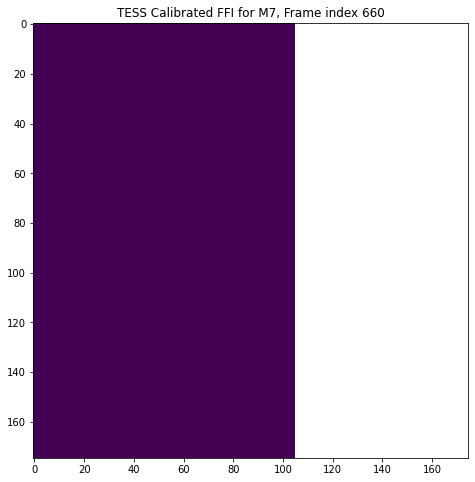

In [27]:
plt.figure(figsize = (8,8))

BRIGHTNESS_PERCENTILES = {"M7":[20, 100], "NGC 752":[0, 99], "IC 2391":[0, 99]}# Not sure what the last number does
def get_brightness():
    if NAME in BRIGHTNESS_PERCENTILES:
        return BRIGHTNESS_PERCENTILES[NAME]
    return [4, 98]

#plt.subplot(111, projection = wcs_info)
plt.imshow(cal_image[frameIndex], vmin = np.percentile(cal_image[frameIndex],get_brightness()[0]),
           vmax = np.percentile(cal_image[frameIndex], get_brightness()[1]))
plt.title("TESS Calibrated FFI for " + NAME + ", Frame index %i" % frameIndex);

NGC 752 worked quite well, as did IC 2391. I was able to diagnose the errors:

- `timeout: The read operation timed out` happens when you try to summon an image that's too big. Just increase the timeout argument and make sure that you read the Please Note section at the beginning of this notebook.
- `OSError: Header missing END card` means that no TESS sectors contain these objects. The TESScut website can't access them either.

but not this error:

- `HTTP Error 500: Internal Server Error` happens sometimes. You can fix it by going to the TESScut website and just downloading the (huge) file, but they're mostly full of nans. (I don't know why the compression doesn't seem to suppress the nans. Am I not downloading the right files?)